In [119]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [120]:
DATA_DIR = Path().resolve()
DATASET_FILENAME = "6_Grazing_4821_20240513_142048.csv"
DATASET_PATH = DATA_DIR / "data" / "iot-collar" / "Grazing" / DATASET_FILENAME

In [121]:
df = pd.read_csv(DATASET_PATH)
df["Time"] = pd.to_datetime(df["Time"], format="%Y-%m-%d %H:%M:%S.%f")
df = df.set_index("Time")

start_time = df.index[0]
period = pd.Timedelta(minutes=5)
end_time = start_time + period
df = df.loc[start_time:end_time]

In [124]:
COLS = ["MPU9250_AX", "MPU9250_AY", "MPU9250_AZ"]
df = df[COLS]

df["MPU9250_A_MAG"] = np.sqrt(df["MPU9250_AX"]**2 + df["MPU9250_AY"]**2 + df["MPU9250_AZ"]**2)

df

,MPU9250_AX,MPU9250_AY,MPU9250_AZ,MPU9250_A_MAG
Time,,,,
2024-05-13 14:20:48.000,3.20356,-6.81414,-4.65928,8.854614
2024-05-13 14:20:48.100,2.98328,-4.86519,-4.08465,7.018148
2024-05-13 14:20:48.200,5.04237,-9.19885,-7.26906,12.762585
2024-05-13 14:20:48.300,3.64889,-7.44623,-6.72795,10.678298
2024-05-13 14:20:48.400,2.05430,-6.64175,-5.14772,8.650550
...,...,...,...,...
2024-05-13 14:21:28.600,4.63534,-6.42148,-7.41750,10.850857
2024-05-13 14:21:28.700,1.18278,-12.80465,0.25858,12.861761
2024-05-13 14:21:28.800,3.86917,-5.98093,-6.49810,9.641955


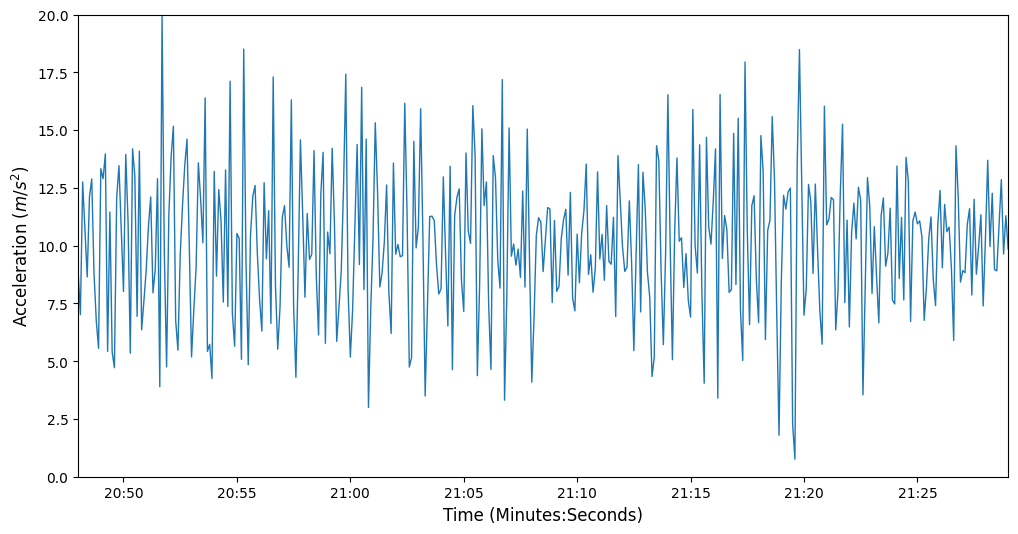

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y="MPU9250_A_MAG", data=df, linewidth=1)

plt.xlabel('Time (Minutes:Seconds)', fontsize=12)
plt.ylabel('Acceleration ($m/s^2$)', fontsize=12)
plt.ylim(0, 20)
plt.xlim(df.index.min(), df.index.max())
# plt.grid(True, linestyle='--', alpha=0.6)

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))
# ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

plt.show()